In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Normalization Function

In [2]:
def norm(x,y,z,gt_x,gt_y,gt_z):
    
    delta_x = gt_x-x
    delta_y = gt_y-y
    delta_z = gt_z-z

    delta_std_x = np.std(delta_x)
    delta_std_y = np.std(delta_y)
    delta_std_z = np.std(delta_z)

    delta_std_x,delta_std_y,delta_std_z

    mean_delta_x = np.mean(delta_x)
    mean_delta_y = np.mean(delta_y)
    mean_delta_z = np.mean(delta_z)

    mean_delta_x, mean_delta_y, mean_delta_z

    norm_x = x + mean_delta_x
    norm_y = y + mean_delta_y
    norm_z = z + mean_delta_z
    
    return norm_x, norm_y, norm_z

## MSE Function
https://statisticsbyjim.com/regression/mean-squared-error-mse/#:~:text=To%20find%20the%20MSE%2C%20take,by%20the%20number%20of%20observations.

In [3]:
## MSE in mm or degree

def MSE(norm_x, norm_y, norm_z, gt_x, gt_y, gt_z, mode):
    
    if mode == "mm": rank = 1000
    elif mode == "degree": rank = 1

    MSE_X = ((np.sum((norm_x-gt_x)**2))/norm_x.shape[0]) * rank
    MSE_Y = ((np.sum((norm_y-gt_y)**2))/norm_y.shape[0]) * rank
    MSE_Z = ((np.sum((norm_z-gt_z)**2))/norm_z.shape[0]) * rank

    return MSE_X, MSE_Y, MSE_Z

## XYZ

In [58]:
participants = [("XYZ/Lena/hand0.npy", "XYZ/Lena/robot0.npy"), ("XYZ/Ildar/hand0.npy", "XYZ/Ildar/robot0.npy"), 
                ("XYZ/Nipun/hand0.npy", "XYZ/Nipun/robot0.npy"), ("XYZ/Lena/hand1.npy", "XYZ/Lena/robot1.npy"),
               ("XYZ/Ildar/hand1.npy", "XYZ/Ildar/robot1.npy"), ("XYZ/Nipun/hand1.npy", "XYZ/Nipun/robot1.npy")]

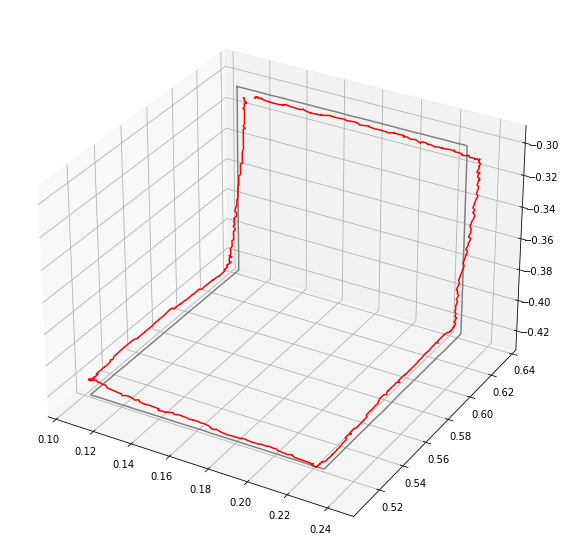

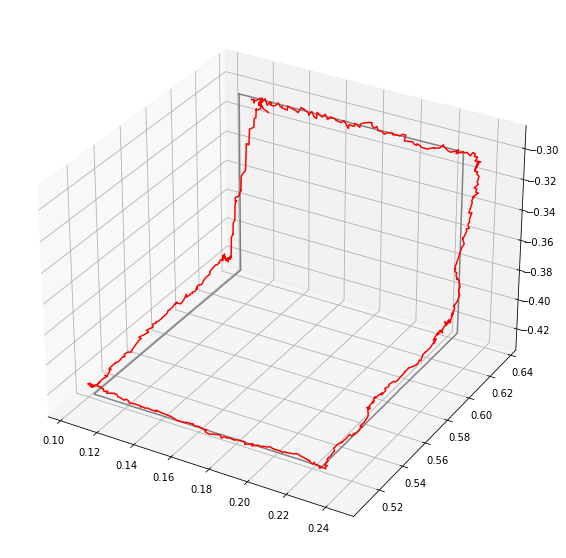

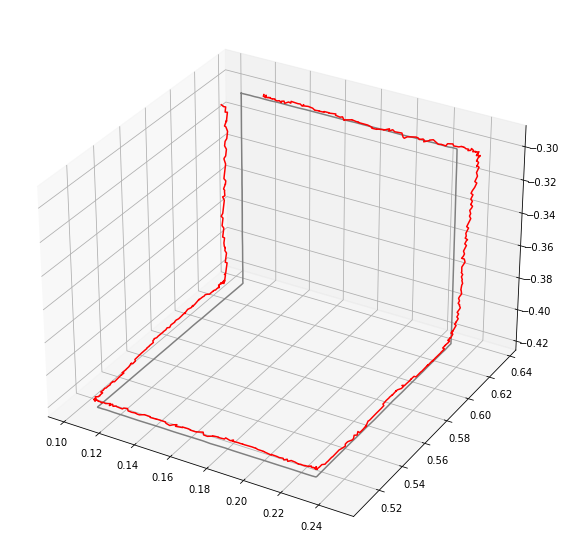

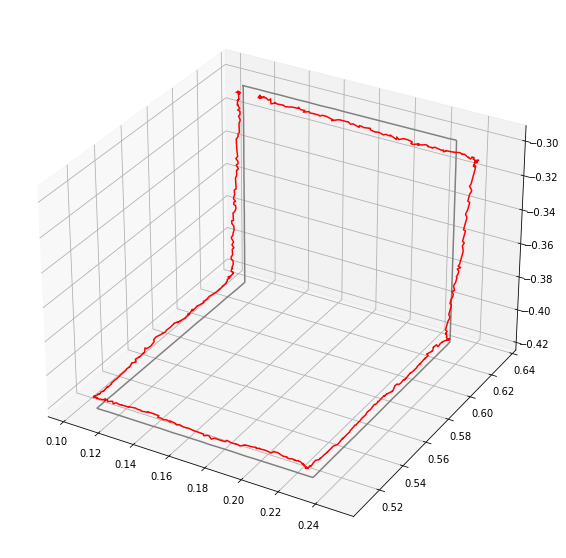

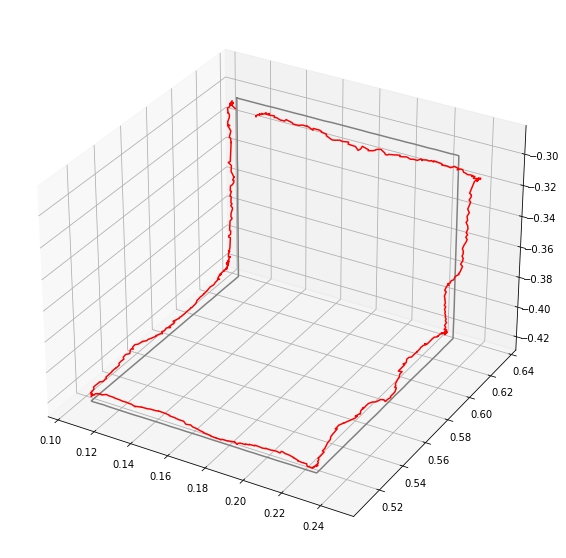

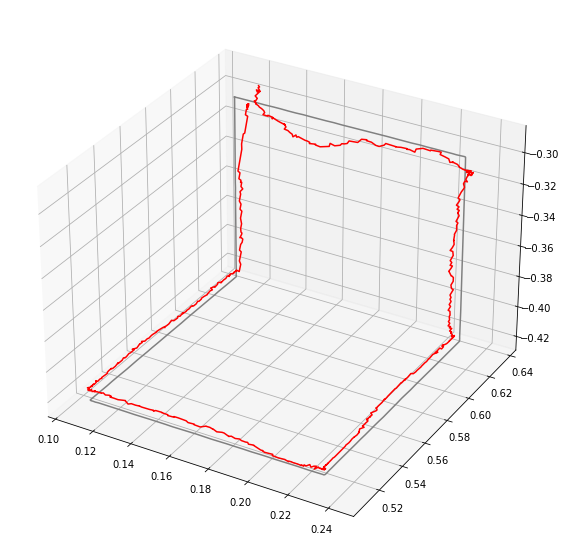

In [60]:
MSE_full = []
for p in participants:

    XYZ = np.load(p[0])
    gt_XYZ = np.load(p[1])

    X = XYZ[:,0]
    Y = XYZ[:,1]
    Z = XYZ[:,2]

    gt_x = gt_XYZ[:,0]
    gt_y = gt_XYZ[:,2]
    gt_z = gt_XYZ[:,1]

    norm_x, norm_y, norm_z = norm(X,Y,Z,gt_x,gt_y,gt_z)

    MSE_full.append(MSE(norm_x, norm_y, norm_z, gt_x, gt_y, gt_z, "mm"))
    
    ax = plt.axes(projection='3d')

    ax.plot3D(gt_x,gt_y,gt_z, 'gray')
    ax.plot3D(norm_x, norm_y, norm_z, 'red')
    ax.figure.set_size_inches(10,10)
    
    plt.show()
    
    
MSE_full = np.array(MSE_full)

In [21]:
X_max = np.max(MSE_full[:,0])
Y_max = np.max(MSE_full[:,1])
Z_max = np.max(MSE_full[:,2])

X_max,Y_max,Z_max

(0.08900292310998313, 0.08807861483565656, 0.041085466239121966)

## RPY

In [65]:
participants = [("RPY/Lena/hand1.npy", "RPY/Lena/robot1.npy"), ("RPY/Ildar/hand1.npy", "RPY/Ildar/robot1.npy"), 
                ("RPY/Andrew/hand1.npy", "RPY/Andrew/robot1.npy"), ("RPY/Lena/hand2.npy", "RPY/Lena/robot2.npy"),
               ("RPY/Ildar/hand2.npy", "RPY/Ildar/robot2.npy"), ("RPY/Andrew/hand2.npy", "RPY/Andrew/robot2.npy")]

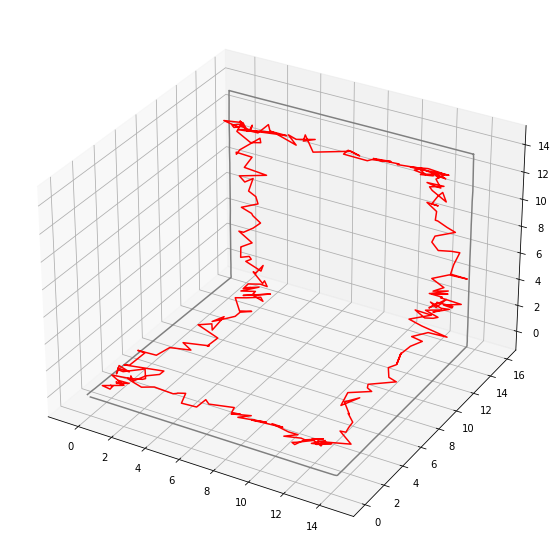

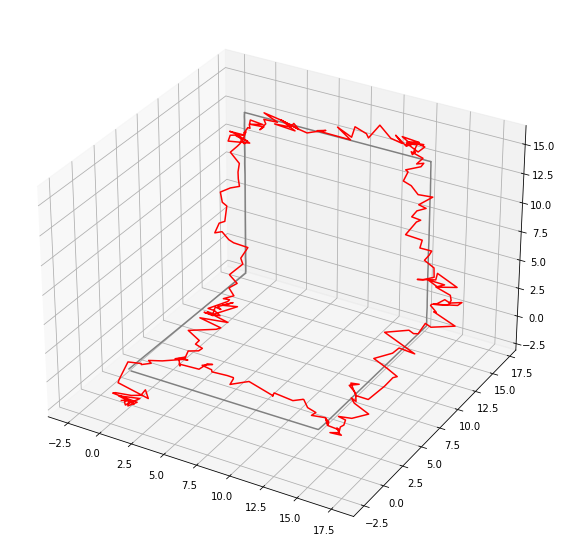

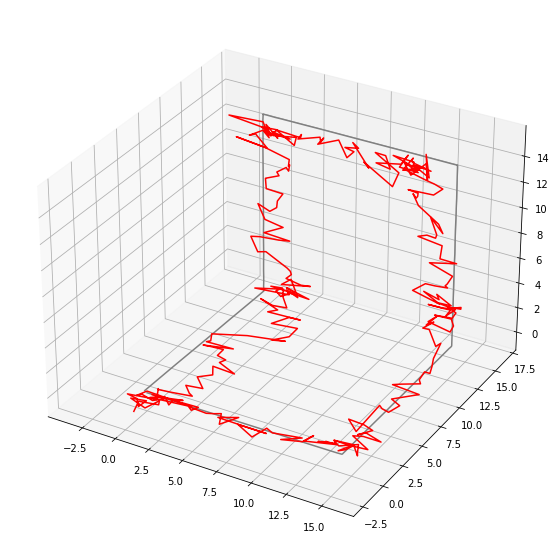

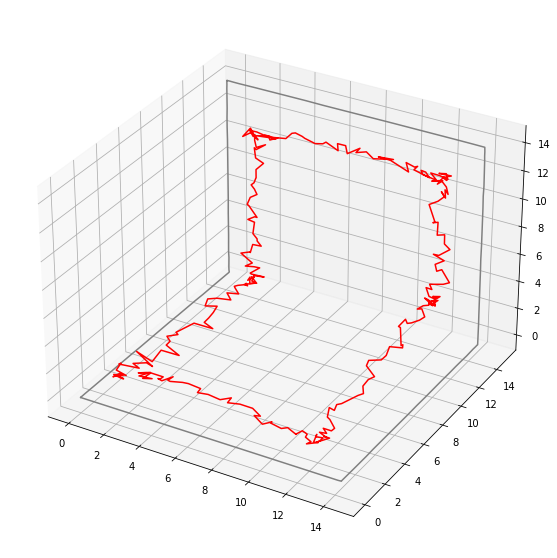

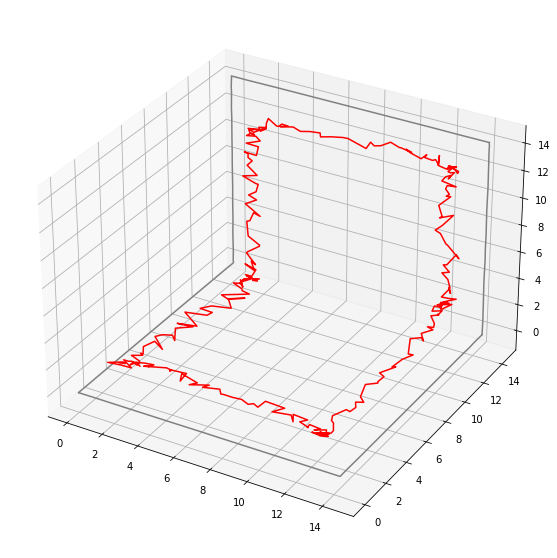

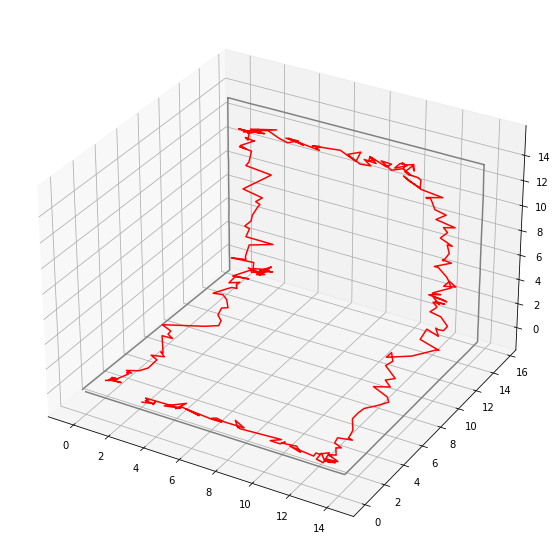

In [66]:
MSE_full = []

for p in participants:

    RPY = np.load(p[0])
    gt_RPY = np.load(p[1])
    
    R_gt = gt_RPY[:,2]* 180/np.pi
    P_gt = gt_RPY[:,0] * 180/np.pi
    Y_gt = gt_RPY[:,1]* 180/np.pi
    
    R = RPY[:,0]
    P = RPY[:,1]
    Y = RPY[:,2]
    
    norm_R, norm_P, norm_Y = norm(R,P,Y,R_gt,P_gt,Y_gt)
    
    MSE_full.append(MSE(norm_R,norm_P,norm_Y, R_gt,P_gt,Y_gt, "degree"))
    
    ax = plt.axes(projection='3d')
    ax.plot3D(R_gt,P_gt,Y_gt, 'gray')
    ax.plot3D(norm_R,norm_P,norm_Y, 'red')
    ax.figure.set_size_inches(10,10)
    plt.show()
    
    
MSE_full = np.array(MSE_full)

In [68]:
R_max = np.mean(MSE_full[:,0])
P_max = np.mean(MSE_full[:,1])
Y_max = np.mean(MSE_full[:,2])

R_max,P_max,Y_max

(1.975319385593437, 3.113032885993013, 2.2655107719561767)

## X

In [6]:
x = np.load("X/handX.npy")
y = np.load("X/handY.npy")
z = np.load("X/handZ.npy")

x.shape, y.shape, z.shape

((300,), (300,), (300,))

In [7]:
gt_x = np.load("X/robotX.npy")
gt_y = np.load("X/robotY.npy")
gt_z = np.load("X/robotZ.npy")

gt_x.shape, gt_y.shape, gt_z.shape

((300,), (300,), (300,))

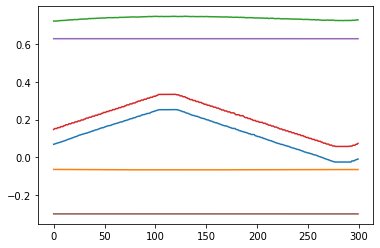

In [8]:
# Not normal data
plt.plot(x)
plt.plot(y)
plt.plot(z)

plt.plot(gt_x)
plt.plot(gt_y)
plt.plot(gt_z)

In [9]:
# Normal data
norm_x, norm_y, norm_z = norm(x,y,z,gt_x,gt_y,gt_z)

# ## X
# plt.figure(figsize=(11,7))

# plt.plot((gt_x-gt_x[0])*1000, label="X Ground Truth",linewidth=3, c="#517f83")
# plt.plot((norm_x-norm_x[0])*1000, label="X", linewidth=3, c="#9e8d77")

# plt.plot((gt_y-gt_y[0])*1000, label="Y Ground Truth",linewidth=3, c="#517f83")
# plt.plot((norm_y-norm_y[0])*1000, label="Y", linewidth=3, c="#9e8d77")

# plt.plot((gt_z-gt_z[0])*1000, label="Z Ground Truth",linewidth=3, c="#517f83")
# plt.plot((norm_z-norm_z[0])*1000, label="Z", linewidth=3, c="#9e8d77")

# plt.legend(fontsize=20)
# plt.xlabel("Number of iterations", fontsize=20)
# plt.ylabel("Coordinate changes, mm", fontsize=20)
# plt.tick_params(labelsize=15, width=3)




In [10]:
# MSE in mm
MSE_X, MSE_Y, MSE_Z = MSE(norm_x, norm_y, norm_z, gt_x, gt_y, gt_z, "mm")
MSE_X, MSE_Y, MSE_Z

(0.004961343893870535, 0.00045089231404000656, 0.05741086436803789)

In [14]:
x0 = gt_x
y0 = gt_y
z0 = gt_z

## Y

In [15]:
x = np.load("Y/handX.npy")
y = np.load("Y/handY.npy")
z = np.load("Y/handZ.npy")

x.shape, y.shape, z.shape

((300,), (300,), (300,))

In [16]:
gt_x = np.load("Y/robotX.npy")
gt_y = np.load("Y/robotY.npy")
gt_z = np.load("Y/robotZ.npy")

gt_x.shape, gt_y.shape, gt_z.shape

((300,), (300,), (300,))

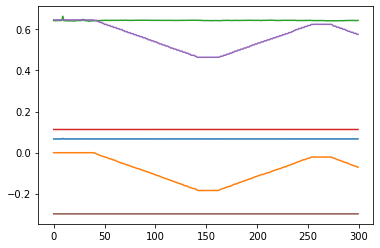

In [17]:
# Not normal data
plt.plot(x)
plt.plot(y)
plt.plot(z)

plt.plot(gt_x)
plt.plot(gt_y)
plt.plot(gt_z)

In [18]:
# Normal data
norm_x, norm_y, norm_z = norm(x,y,z,gt_x,gt_y,gt_z)

In [20]:
# MSE in mm
MSE_X, MSE_Y, MSE_Z = MSE(norm_x, norm_y, norm_z, gt_x, gt_y, gt_z, "mm")
MSE_X, MSE_Y, MSE_Z

(2.396954300371295e-05, 0.0027953502882739766, 0.002312848381563917)

In [21]:
x1 = gt_x
y1 = gt_y
z1 = gt_z

## Z

In [22]:
x = np.load("Z/handX.npy")
y = np.load("Z/handY.npy")
z = np.load("Z/handZ.npy")

x.shape, y.shape, z.shape

((300,), (300,), (300,))

In [23]:
gt_x = np.load("Z/robotX.npy")
gt_y = np.load("Z/robotY.npy")
gt_z = np.load("Z/robotZ.npy")

gt_x.shape, gt_y.shape, gt_z.shape

((300,), (300,), (300,))

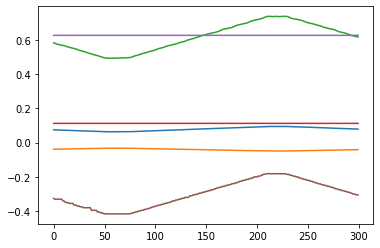

In [24]:
# Not normal data
plt.plot(x)
plt.plot(y)
plt.plot(z)

plt.plot(gt_x)
plt.plot(gt_y)
plt.plot(gt_z)

In [25]:
# Normal data
norm_x, norm_y, norm_z = norm(x,y,z,gt_x,gt_y,gt_z)

In [26]:
# MSE in mm
MSE_X, MSE_Y, MSE_Z = MSE(norm_x, norm_y, norm_z, gt_x, gt_y, gt_z, "mm")
MSE_X, MSE_Y, MSE_Z

(0.10675294158449689, 0.02956751731712697, 0.026697966792987145)

In [27]:
x2 = gt_x
y2 = gt_y
z2 = gt_z

## Roll

In [49]:
r = np.load("Roll/handR.npy")[50:]
p = np.load("Roll/handP.npy")[50:]
y = np.load("Roll/handY.npy")[50:]

r.shape, p.shape, y.shape

((300,), (300,), (300,))

In [50]:
gt_r = np.load("Roll/robotR.npy")[50:]
gt_p = np.load("Roll/robotP.npy")[50:]*-1
gt_y = np.load("Roll/robotY.npy")[50:]

gt_r.shape, gt_p.shape, gt_y.shape

((300,), (300,), (300,))

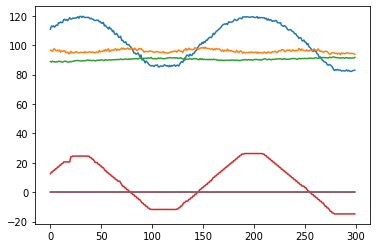

In [51]:
# Not normal data
plt.plot(r)
plt.plot(p)
plt.plot(y)

plt.plot(gt_r)
plt.plot(gt_p)
plt.plot(gt_y)

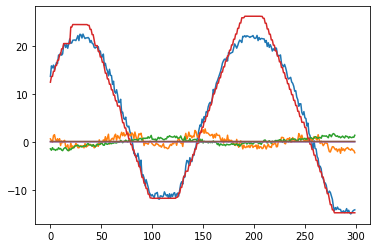

In [52]:
#Normal data
norm_r, norm_p, norm_y = norm(r,p,y,gt_r,gt_p,gt_y)

plt.plot(norm_r)
plt.plot(norm_p)
plt.plot(norm_y)

plt.plot(gt_r)
plt.plot(gt_p)
plt.plot(gt_y)

In [53]:
# MSE in degree
MSE_R, MSE_P, MSE_Y = MSE(norm_r, norm_p, norm_y, gt_r, gt_p, gt_y, "degree")
MSE_R, MSE_P, MSE_Y

(3.8821348050886884, 1.1613723919708208, 0.603872968583351)

## Pitch

In [19]:
r = np.load("Pitch/handR.npy")[50:]
p = np.load("Pitch/handP.npy")[50:]
y = np.load("Pitch/handY.npy")[50:]

r.shape, p.shape, y.shape

((300,), (300,), (300,))

In [20]:
gt_r = np.load("Pitch/robotR.npy")[50:]
gt_p = np.load("Pitch/robotP.npy")[50:] *-1
gt_y = np.load("Pitch/robotY.npy")[50:]

gt_r.shape, gt_p.shape, gt_y.shape

((300,), (300,), (300,))

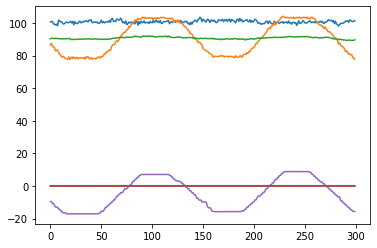

In [21]:
# Not normal data
plt.plot(r)
plt.plot(p)
plt.plot(y)

plt.plot(gt_r)
plt.plot(gt_p)
plt.plot(gt_y)

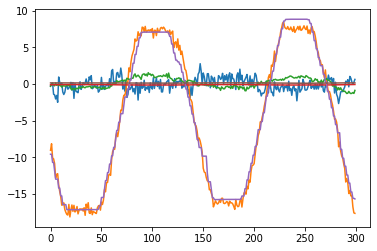

In [22]:
# Normal data
norm_r, norm_p, norm_y = norm(r,p,y,gt_r,gt_p,gt_y)

plt.plot(norm_r)
plt.plot(norm_p)
plt.plot(norm_y)

plt.plot(gt_r)
plt.plot(gt_p)
plt.plot(gt_y)

In [23]:
# MSE in degree
MSE_R, MSE_P, MSE_Y = MSE(norm_r, norm_p, norm_y, gt_r, gt_p, gt_y, "degree")
MSE_R, MSE_P, MSE_Y

(0.7702822654017569, 1.0818350908995615, 0.46094566631865785)

## Yaw

In [63]:
r = np.load("Yaw/handR.npy")[50:]
p = np.load("Yaw/handP.npy")[50:]*-0.3
y = np.load("Yaw/handY.npy")[50:]

r.shape, p.shape, y.shape

((300,), (300,), (300,))

In [64]:
gt_r = np.load("Yaw/robotR.npy")[50:]
gt_p = np.load("Yaw/robotP.npy")[50:]
gt_y = np.load("Yaw/robotY.npy")[50:]

gt_r.shape, gt_p.shape, gt_y.shape

((300,), (300,), (300,))

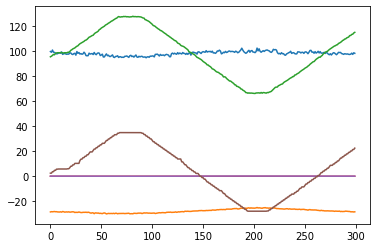

In [65]:
# Not normal data
plt.plot(r)
plt.plot(p)
plt.plot(y)

plt.plot(gt_r)
plt.plot(gt_p)
plt.plot(gt_y)

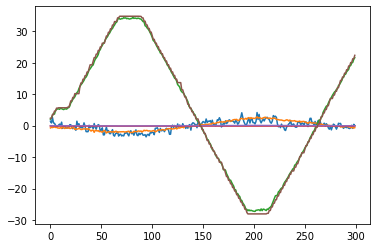

In [66]:
# Normal data
norm_r, norm_p, norm_y = norm(r,p,y,gt_r,gt_p,gt_y)

plt.plot(norm_r)
plt.plot(norm_p)
plt.plot(norm_y)

plt.plot(gt_r)
plt.plot(gt_p)
plt.plot(gt_y)

In [67]:
# MSE in degree
MSE_R, MSE_P, MSE_Y = MSE(norm_r, norm_p, norm_y, gt_r, gt_p, gt_y, "degree")
MSE_R, MSE_P, MSE_Y

(2.3682173810588605, 1.9588193745327314, 0.484765198776127)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urx
import cv2

import sys
sys.path.append('..')

from utils.position.pose_estimation import PoseEstimation
from utils.setup.setup import SetUp
from utils.support import*

In [2]:

hands, mpDraw, mpHands = SetUp.mediapipe()
W = 640
H = 480
pipeline, config, align = SetUp.camera(640, 480, 60)
# cvFpsCalc = CvFpsCalc(buffer_len=10)
poseEstimation = PoseEstimation(640, 480)
# orientEstimation = OrientEstimation(640, 480)

try:
    pipeline.start(config)
except:
    pipeline.stop()
    pipeline.start(config)

times = 0   
X, Y, Z = [],[],[]
X_number = 0
while times < 350:

    frames = pipeline.wait_for_frames()
    frames = align.process(frames)
    depth_frame = frames.get_depth_frame()
    color_frame = frames.get_color_frame()

    depth_image = np.asanyarray(depth_frame.get_data())
    color_image = np.asanyarray(color_frame.get_data())

    dr_info = DrawInfo(color_image)

    coordinates = hands.process(color_image).multi_hand_landmarks
    if coordinates:
        list_for_coordinates = []
        for handLms in coordinates:
            rect = Bounding_Rect(color_image, handLms)
            brect, image = rect.draw()

        mpDraw.draw_landmarks(color_image, handLms, mpHands.HAND_CONNECTIONS)
        

        x, y, z = poseEstimation.PoseStart(handLms, depth_frame)
        X.append(x)
        Y.append(y)
        Z.append(z)
 
        # pos = rob.get_pos()
        # GT.append(pos.get_list())
        
        times += 1


    # dr_info.FPS(fps)
    cv2.imshow('RealSense', color_image)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        pipeline.stop()
        break

try:        
    cv2.destroyAllWindows()
    pipeline.stop()
    
except:
    pass

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [3]:
X = np.array(X)
x = X[50:] 

Y = np.array(Y)
y = Y[50:]

Z = np.array(Z)
z = Z[50:] 

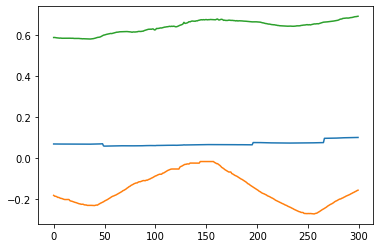

In [5]:
plt.plot(x)
plt.plot(y)
plt.plot(z)

In [10]:
import pyrealsense2 as rs

pipeline = rs.pipeline()
config = rs.config()
rs.config.enable_device_from_file(config, bag_file_path)
config.enable_stream(rs.stream.depth)
config.enable_stream(rs.stream.color)

profile = pipeline.start(config)
depth_sensor = profile.get_device().first_depth_sensor()
depth_scale = depth_sensor.get_depth_scale()

align_to = rs.stream.color
align = rs.align(align_to)
try:
	while True:
		frames = pipeline.wait_for_frames()
		aligned_frames = align.process(frames)
		aligned_depth_frame = aligned_frames.get_depth_frame()
		color_frame = aligned_frames.get_color_frame()

		depth_image = np.asanyarray(aligned_depth_frame.get_data())
		color_image = np.asanyarray(color_frame.get_data())
		num_rows = depth_image.shape[0]
		num_cols = depth_image.shape[1]

		depth_intrin = aligned_depth_frame.profile.as_video_stream_profile().intrinsics
		print(depth_intrin)

		for r in range(0, num_rows, 5):
			for c in range(0, num_cols, 5):
				depth = aligned_depth_frame.get_distance(c, r)
				depth_point_in_meters_camera_coords = rs.rs2_deproject_pixel_to_point(depth_intrin, [c, r], depth)
				#some other stuff I do here with this depth point, such as projecting it to world coordinates etc.

finally:
	pipeline.stop()

NameError: name 'bag_file_path' is not defined

In [12]:
pipeline, config, align = SetUp.camera(640, 480, 60)

try:
    pipeline.start(config)
except:
    pipeline.stop()
    pipeline.start(config)


while True:

    frames = pipeline.wait_for_frames()
    frames = align.process(frames)
    depth_frame = frames.get_depth_frame()
    color_frame = frames.get_color_frame()

    depth_image = np.asanyarray(depth_frame.get_data())
    color_image = np.asanyarray(color_frame.get_data())
    
    depth_intrin = depth_frame.profile.as_video_stream_profile().intrinsics


    cv2.imshow('RealSense', color_image)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        pipeline.stop()
        break

In [13]:
depth_intrin

[ 640x480  p[323.726 244.583]  f[607.593 606.723]  Inverse Brown Conrady [0 0 0 0 0] ]

In [14]:
depth_frame

<pyrealsense2.frame Z16 #143 @1650278911714.000732>